# Communities

This notebook aims to find interaction among users and their contribution to different subreddits. The objective is to determine if the same small set of people contribute to most of the conversations across different subreddits or if each subreddit attracts its own set of people.

We use 'community' and 'networkx' libraries to accomplish this task. Ideally this analysis should be performed on the entire dataset. However detecting communities and drawing networks on the entire dataset is computationally very intensive in terms of time and memory. As a result, we decided to perform this analysis on the data for the year 2014 alone (2015 could not be used, since we had data till August only).

The idea is to consider the top 3 or 4 submissions with the most number of comments in 2014 for each country. Each node in the graph is a reddit user who contributed to these discussions. Each edge in the graph represents the user's comment to the submission. This will help us determine if the same set of users are commenting on submissions in different subreddits. 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
import os
import glob
from urllib import parse
# from langdetect import detect
# import langid
import requests
import json
import pickle

In [2]:
import community
import networkx as nx
import matplotlib.pyplot as plt

## UK

Load the 2014 UK reddit comments

In [20]:
path = "../data/reddit_uk_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
#dfs = dfs[dfs.num_comments >= 2000]
dfs1 = dfs

path = '../data'
comment_folder = glob.glob(os.path.join(path, "reddit_uk_comments_2014"))
comments_files = [glob.glob(os.path.join(folder, "part-*")) for folder in comment_folder]
comments_files_all = [file for sublist in comments_files for file in sublist]
dfc = pd.concat((pd.read_csv(f) for f in comments_files_all), ignore_index=True)
dfc = dfc[dfc['link_id'].isin(dfs['name'])]

As explained earlier, we draw the communication graph. Each node in the graph is a reddit user who contributed to these discussions. Each edge in the graph represents the user's comment to the submission. 

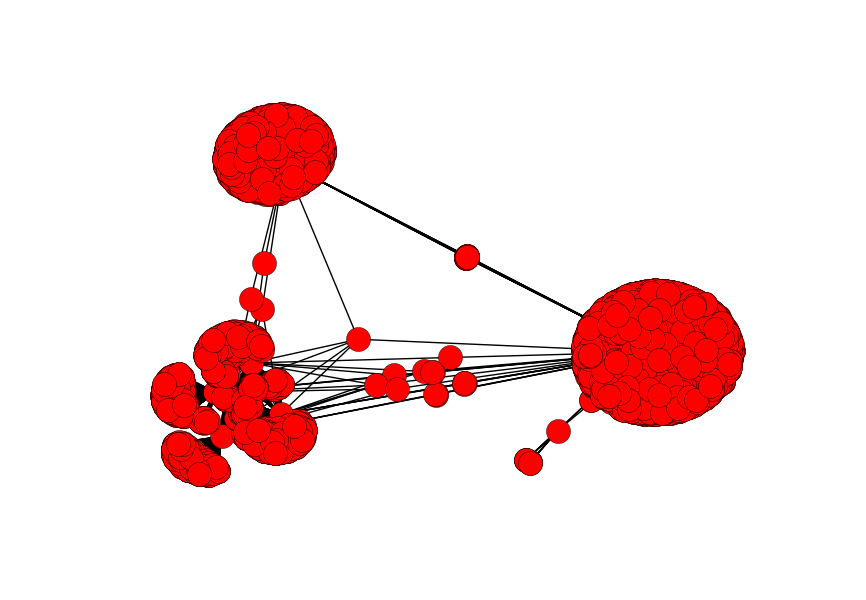

In [21]:
dfs = dfs1
dfs = dfs[dfs.num_comments >= 2000]
dfsc = dfs.merge(dfc, how='inner', left_on='name', right_on='link_id')
dfsc = dfsc[dfsc.author_x != dfsc.author_y]
df_uk = dfsc[['author_x','author_y']]
df = df_uk

edges = list(zip(df['author_x'],df['author_y']))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)
plt.savefig("../figures/communities_uk.png")

The three top submissions in UK in the year 2014 were:

<b>
1. Doctor Who 8x01: Deep Breath Post-Episode Discussion Thread
2. Match Thread: Liverpool vs Basel [Champions League Group Stage] [Live]
3. Random stuff that baffles me as an immigrant
</b>

It can be noted from the above figure that although there are a few users who contribute to two of these discussion threads, a vast majority of users contribute to only one discussion.

## Switzerland

Load the 2014 Switzerland reddit comments.

In [3]:
path = "../data/reddit_swiss_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
#dfs = dfs[dfs.num_comments >= 2000]
dfs1 = dfs

path = '../data'
comment_folder = glob.glob(os.path.join(path, "reddit_swiss_comments_2014"))
comments_files = [glob.glob(os.path.join(folder, "part-*")) for folder in comment_folder]
comments_files_all = [file for sublist in comments_files for file in sublist]
dfc = pd.concat((pd.read_csv(f) for f in comments_files_all), ignore_index=True)
dfc = dfc[dfc['link_id'].isin(dfs['name'])]

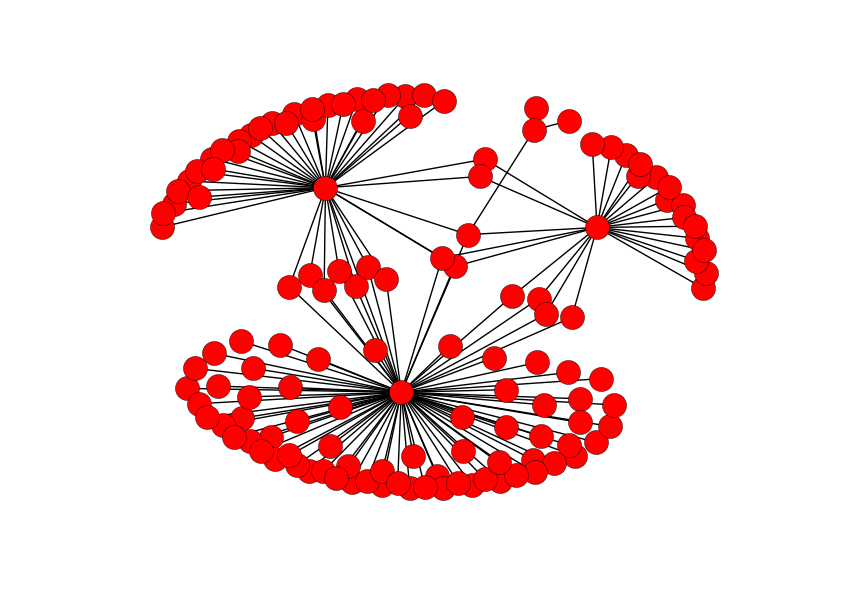

In [4]:
dfs = dfs1
dfs = dfs[dfs.num_comments >= 140]
dfsc = dfs.merge(dfc, how='inner', left_on='name', right_on='link_id')
dfsc = dfsc[dfsc.author_x != dfsc.author_y]
df_swiss = dfsc[['author_x','author_y']]
df = df_swiss

edges = list(zip(df['author_x'],df['author_y']))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)
plt.savefig("../figures/communities_swiss.png")

The three top submissions in Switzerland in the year 2014 were:

<b>
1. Anyone else genuinely concerned about the Masseneinwanderungsinitiative?
2. Swiss reject public health insurance plan
3. American here.You guys have a higher Freedom of the Press rating than the US, you aren't part of the EU,most of your energy comes from renewable sources,you remain neutral in wars, and you have bank secrecy
</b>

The first topic referes to the referundum. It can be noted from the above figure that there are a considerable number of users who contribute to two or more of these discussions.

In [5]:
dfsc.groupby(by='title').describe()

controversiality  \
title                                                                        
American here.You guys have a higher Freedom of... count        140.000000   
                                                   mean           0.000000   
                                                   std            0.000000   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            0.000000   
American? Thinking of moving to Switzerland?       count          3.000000   
                                                   mean           0.333333   
                                                   std            0.577350   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.500000   
                                                   max            1.000000   
Anyone else genuinely concerned about the Masse... count        355.000000   
                                                   mean           0.081690   
                                                   std            0.274279   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            1.000000   
Swiss reject public health insurance plan          count        144.000000   
                                                   mean           0.000000   
                                                   std            0.000000   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            0.000000   

                                                               created  \
title                                                                    
American here.You guys have a higher Freedom of... count  1.400000e+02   
                                                   mean   1.418487e+09   
                                                   std    0.000000e+00   
                                                   min    1.418487e+09   
                                                   25%    1.418487e+09   
                                                   50%    1.418487e+09   
                                                   75%    1.418487e+09   
                                                   max    1.418487e+09   
American? Thinking of moving to Switzerland?       count  3.000000e+00   
                                                   mean   1.382395e+09   
                                                   std    0.000000e+00   
                                                   min    1.382395e+09   
                                                   25%    1.382395e+09   
                                                   50%    1.382395e+09   
                                                   75%    1.382395e+09   
                                                   max    1.382395e+09   
Anyone else genuinely concerned about the Masse... count  3.550000e+02   

## EU

Load the 2014 reddit comments for Germany, France, Italy, Spain.

In [7]:
path = "../data/reddit_europe_submissions_fullcorpus"
all_files = glob.glob(os.path.join(path, "part-*"))
dfs_eu = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)
#dfs = dfs[dfs.num_comments >= 2000]
dfs1 = dfs_eu

path = '../data'
comment_folder = glob.glob(os.path.join(path, "reddit_europe_comments_2014"))
comments_files = [glob.glob(os.path.join(folder, "part-*")) for folder in comment_folder]
comments_files_all = [file for sublist in comments_files for file in sublist]
dfc_eu = pd.concat((pd.read_csv(f) for f in comments_files_all), ignore_index=True)
dfc_eu = dfc_eu[dfc_eu['link_id'].isin(dfs_eu['name'])]

Create dataframes with comments from each country.

In [8]:
germany_subreddit_list = ['germany', 'de', 'German', 'GermanPractice', 'GermanFacts', 'GermanConversation',                  ## germany
     'SCHLAND', 'germanyusa', 'DEjobs', 'bundesliga', 'GermanyPics', 'germusic', 'de_punk', 'germanrap', 'NDH']                 ## germany
dfs_de = dfs_eu[dfs_eu['subreddit'].isin(germany_subreddit_list)]
dfc_de = dfc_eu[dfc_eu['subreddit'].isin(germany_subreddit_list)]

france_subreddit_list  = ['blagues', 'cinemacinema', 'france', 'FrancePics', 'frenchelectro', 'Frenchhistory', 'guessthefrenchmovie',      ## france
     'Ligue1', 'Livres', 'musiquefrancaise', 'paris', 'pedale', 'philosophie', 'Politique', 'rance', 'ScienceFr', 'SocialFrance']## france
dfs_fr = dfs_eu[dfs_eu['subreddit'].isin(france_subreddit_list)]
dfc_fr = dfc_eu[dfc_eu['subreddit'].isin(france_subreddit_list)]

italy_subreddit_list  = ['Calcio', 'ITAGLIA', 'Italianhistory', 'ITALIANMUSIC', 'italy', 'ItalyPhotos', 'Libri', 'Abruzzo', 'Apulia', 'bari',       ## italy
     'Basilicata', 'bologna', 'Calabria', 'Campania', 'Catania', 'emilia_romagna', 'firenze', 'friuli', 'Genova', 'Italia',     ## italy
     'lazio', 'Liguria', 'lombardia', 'Lombardy', 'marche', 'messina', 'milano', 'Modena', 'molise', 'Naples_Italy', 'napoli',  ## italy
     'padova', 'Palermo', 'Perugia', 'Piedmont', 'piemonte', 'Pisa', 'puglia', 'roma', 'rome', 'romesocialclub', 'Sardegna',    ## italy
     'Sardinia', 'Sicilia', 'sicily', 'Siracusa', 'torino', 'Toscana', 'trentino_alto_adige', 'trentod', 'Trieste',             ## italy
     'tuscany', 'Umbria', 'valle_daosta', 'Veneto', 'Venezia']                                                                 ## italy
dfs_it = dfs_eu[dfs_eu['subreddit'].isin(italy_subreddit_list)]
dfc_it = dfc_eu[dfc_eu['subreddit'].isin(italy_subreddit_list)]

spain_subreddit_list   =  ['Barcelona', 'EPANA', 'es', 'futbol', 'Granada', 'LaLiga', 'Madrid', 'spain', 'Andalucia', 'SpanishHistory']     ## spain 
dfs_es = dfs_eu[dfs_eu['subreddit'].isin(spain_subreddit_list)]
dfc_es = dfc_eu[dfc_eu['subreddit'].isin(spain_subreddit_list)]

## Germany

Draw the network for Germany.

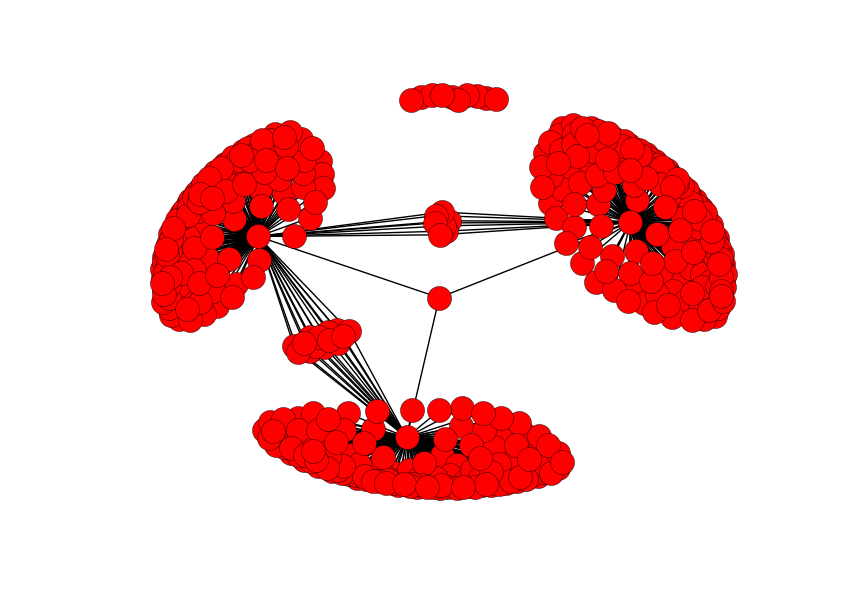

In [9]:
## Germany
dfs = dfs_de[dfs_de.num_comments >= 300]
dfsc = dfs.merge(dfc_de, how='inner', left_on='name', right_on='link_id')
dfsc = dfsc[dfsc.author_x != dfsc.author_y]
df = dfsc[['author_x','author_y']]

edges = list(zip(df['author_x'],df['author_y']))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)
plt.savefig("../figures/communities_germany.png")

The three top submissions in Germany in the year 2014 were:

<b>
1. Expats in Germany, what is something you wished you were told before arriving?
2. Hallo! Ich würde gern mit der deutschsprachigen Redditgemeinschaft diskutieren und einige Fragen stellen...
3. The unwillingness to learn German for university
</b>

It can be noted from the above figure that there are a considerable number of users who contribute to two or more of these discussions.

In [10]:
dfsc.groupby('title').count()
#dfsc

,adserver_click_url,adserver_imp_pixel,archived_x,author_x,author_flair_css_class_x,author_flair_text_x,created,created_utc_x,disable_comments,distinguished_x,...,link_id,name_y,parent_id,removal_reason,retrieved_on_y,score_y,score_hidden,subreddit_y,subreddit_id_y,ups_y
title,,,,,,,,,,,,,,,,,,,,,
"Expats in Germany, what is something you wished you were told before arriving?",494,494,494,494,494,494,494,494,494,494,...,494,494,494,494,494,494,494,494,494,494
Hallo! Ich würde gern mit der deutschsprachigen Redditgemeinschaft diskutieren und einige Fragen stellen...,488,488,488,488,488,488,488,488,488,488,...,488,488,488,488,488,488,488,488,488,488
"Living in Germany as a foreigner, what did surprise you the most in the beginning? What are the differences to your home country?",9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
The unwillingness to learn German for university,314,314,314,314,314,314,314,314,314,314,...,314,314,314,314,314,314,314,314,314,314


## France

In [11]:
## France
dfs = dfs_fr[dfs_fr.num_comments >= 400]
dfsc = dfs.merge(dfc_fr, how='inner', left_on='name', right_on='link_id')
dfsc = dfsc[dfsc.author_x != dfsc.author_y]

dfsc.groupby('subreddit_x').count()

,adserver_click_url,adserver_imp_pixel,archived_x,author_x,author_flair_css_class_x,author_flair_text_x,created,created_utc_x,disable_comments,distinguished_x,...,link_id,name_y,parent_id,removal_reason,retrieved_on_y,score_y,score_hidden,subreddit_y,subreddit_id_y,ups_y
subreddit_x,,,,,,,,,,,,,,,,,,,,,
france,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692,...,1692,1692,1692,1692,1692,1692,1692,1692,1692,1692


In [12]:
dfsc.groupby(by='title').describe()

controversiality  \
title                                                                        
Quel est la conviction ou l'avis le plus politi... count        403.000000   
                                                   mean           0.017370   
                                                   std            0.130807   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            1.000000   
Quel petit truc pas grave vous énerve tellement... count        413.000000   
                                                   mean           0.004843   
                                                   std            0.069504   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            1.000000   
Qui sont les utilisateurs de /r/France ? Présen... count        389.000000   
                                                   mean           0.000000   
                                                   std            0.000000   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            0.000000   
le Front national en tête aux européennes. La F... count        487.000000   
                                                   mean           0.170431   
                                                   std            0.376398   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            1.000000   

                                                               created  \
title                                                                    
Quel est la conviction ou l'avis le plus politi... count  4.030000e+02   
                                                   mean   1.408633e+09   
                                                   std    0.000000e+00   
                                                   min    1.408633e+09   
                                                   25%    1.408633e+09   
                                                   50%    1.408633e+09   
                                                   75%    1.408633e+09   
                                                   max    1.408633e+09   
Quel petit truc pas grave vous énerve tellement... count  4.130000e+02   
                                                   mean   1.406201e+09   
                                                   std    0.000000e+00   
                                                   min    1.406201e+09   
                                                   25%    1.406201e+09   
                                                   50%    1.406201e+09   
                                                   75%    1.406201e+09   
                                                   max    1.406201e+09   
Qui sont les utilisateurs de /r/France ? Présen... count  3.890000e+02   

Draw the network for France.

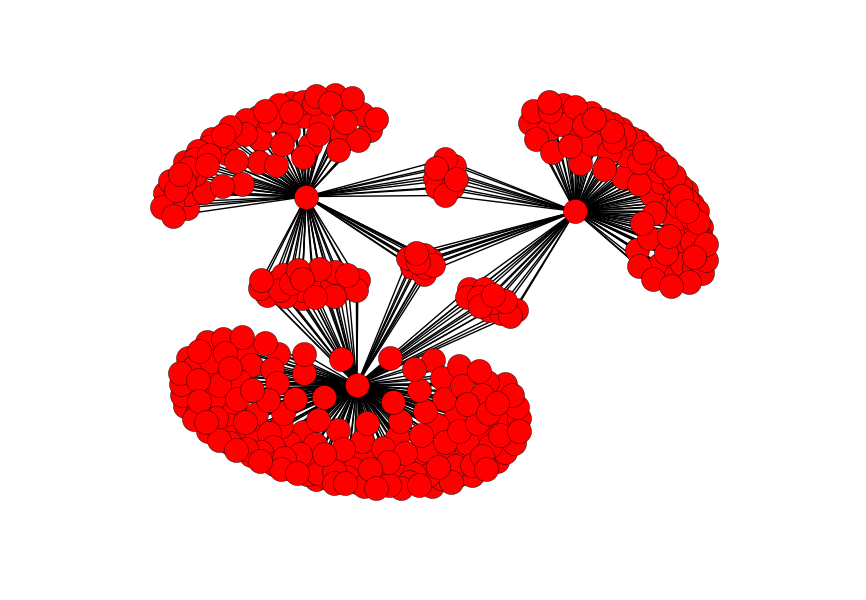

In [13]:
df = dfsc[['author_x','author_y']]
edges = list(zip(df['author_x'],df['author_y']))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)
plt.savefig("../figures/communities_france.png")

The three top submissions in France in the year 2014 were:

<b>
1. le Front national en tête aux européennes. La France, la honte de l'Europe
2. Quel petit truc pas grave vous énerve tellement que vous pourriez en parler pendant des heures?
3. Quel est la conviction ou l'avis le plus politiquement incorrect que vous ayez ?
</b>

It can be noted from the above figure that there are a considerable number of users who contribute to two or more of these discussions.

## Italy

In [14]:
## Italy
dfs = dfs_it[dfs_it.num_comments >= 400]
dfsc = dfs.merge(dfc_it, how='inner', left_on='name', right_on='link_id')
dfsc = dfsc[dfsc.author_x != dfsc.author_y]

dfsc.groupby('subreddit_x').count()

,adserver_click_url,adserver_imp_pixel,archived_x,author_x,author_flair_css_class_x,author_flair_text_x,created,created_utc_x,disable_comments,distinguished_x,...,link_id,name_y,parent_id,removal_reason,retrieved_on_y,score_y,score_hidden,subreddit_y,subreddit_id_y,ups_y
subreddit_x,,,,,,,,,,,,,,,,,,,,,
italy,1657,1657,1657,1657,1657,1204,1657,1657,1657,1657,...,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657


In [15]:
dfsc.groupby(by='title').describe()

controversiality  \
title                                                                        
Megathread sui risultati elettorali                count        453.000000   
                                                   mean           0.000000   
                                                   std            0.000000   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            0.000000   
Qual è, per davvero, la vostra opinione più con... count        494.000000   
                                                   mean           0.000000   
                                                   std            0.000000   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            0.000000   
Thread delle opinioni impopolari                   count        710.000000   
                                                   mean           0.009859   
                                                   std            0.098872   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            1.000000   

                                                               created  \
title                                                                    
Megathread sui risultati elettorali                count  4.530000e+02   
                                                   mean   1.401052e+09   
                                                   std    0.000000e+00   
                                                   min    1.401052e+09   
                                                   25%    1.401052e+09   
                                                   50%    1.401052e+09   
                                                   75%    1.401052e+09   
                                                   max    1.401052e+09   
Qual è, per davvero, la vostra opinione più con... count  4.940000e+02   
                                                   mean   1.418033e+09   
                                                   std    0.000000e+00   
                                                   min    1.418033e+09   
                                                   25%    1.418033e+09   
                                                   50%    1.418033e+09   
                                                   75%    1.418033e+09   
                                                   max    1.418033e+09   
Thread delle opinioni impopolari                   count  7.100000e+02   
                                                   mean   1.393189e+09   
                                                   std    0.000000e+00   
                                                   min    1.393189e+09   
                                                   25%    1.393189e+09   
                                                   50%    1.393189e+09   
                                                   75%    1.393189e+09   
                                                   max    1.393189e+09   

                                                          created_utc_x  \
title                        

Draw the network for Italy.

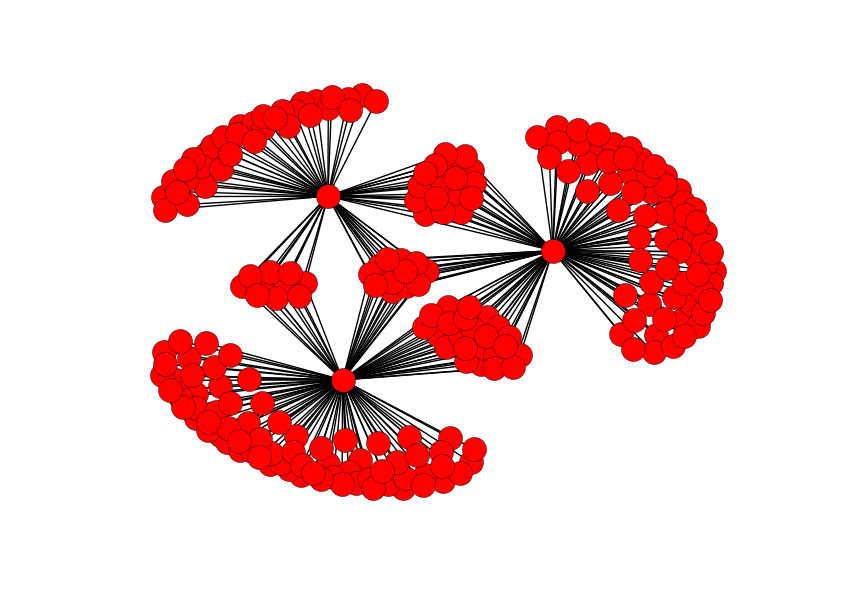

In [16]:
df = dfsc[['author_x','author_y']]
edges = list(zip(df['author_x'],df['author_y']))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)
plt.savefig("../figures/communities_italy.png")

The three top submissions in Italy in the year 2014 were:

<b>
1. Thread delle opinioni impopolari
2. Qual è, per davvero, la vostra opinione più controversa al mondo di oggi?
3. Megathread sui risultati elettorali
</b>

The first topic referes to the referundum. It can be noted from the above figure that there are a considerable number of users who contribute to two or more of these discussions.

## Spain

In [ ]:
## Spain
dfs = dfs_es[dfs_es.num_comments >= 90]
dfsc = dfs.merge(dfc_es, how='inner', left_on='name', right_on='link_id')
dfsc = dfsc[dfsc.author_x != dfsc.author_y]

dfsc.groupby('subreddit_x').count()

In [18]:
dfsc.groupby(by='title').describe()

controversiality  \
title                                                                        
Barcelona vs Manchester City live stream free w... count        100.000000   
                                                   mean           0.000000   
                                                   std            0.000000   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            0.000000   
Did you vote in the consultation?                  count         85.000000   
                                                   mean           0.000000   
                                                   std            0.000000   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            0.000000   
Estoy totalmente en contra de la independencia.... count         97.000000   
                                                   mean           0.000000   
                                                   std            0.000000   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            0.000000   
META Catalan nitpickers are ruining this subred... count        144.000000   
                                                   mean           0.062500   
                                                   std            0.242906   
                                                   min            0.000000   
                                                   25%            0.000000   
                                                   50%            0.000000   
                                                   75%            0.000000   
                                                   max            1.000000   

                                                               created  \
title                                                                    
Barcelona vs Manchester City live stream free w... count  1.000000e+02   
                                                   mean   1.392698e+09   
                                                   std    0.000000e+00   
                                                   min    1.392698e+09   
                                                   25%    1.392698e+09   
                                                   50%    1.392698e+09   
                                                   75%    1.392698e+09   
                                                   max    1.392698e+09   
Did you vote in the consultation?                  count  8.500000e+01   
                                                   mean   1.415611e+09   
                                                   std    0.000000e+00   
                                                   min    1.415611e+09   
                                                   25%    1.415611e+09   
                                                   50%    1.415611e+09   
                                                   75%    1.415611e+09   
                                                   max    1.415611e+09   
Estoy totalmente en contra de la independencia.... count  9.700000e+01   

Draw the network for Spain.

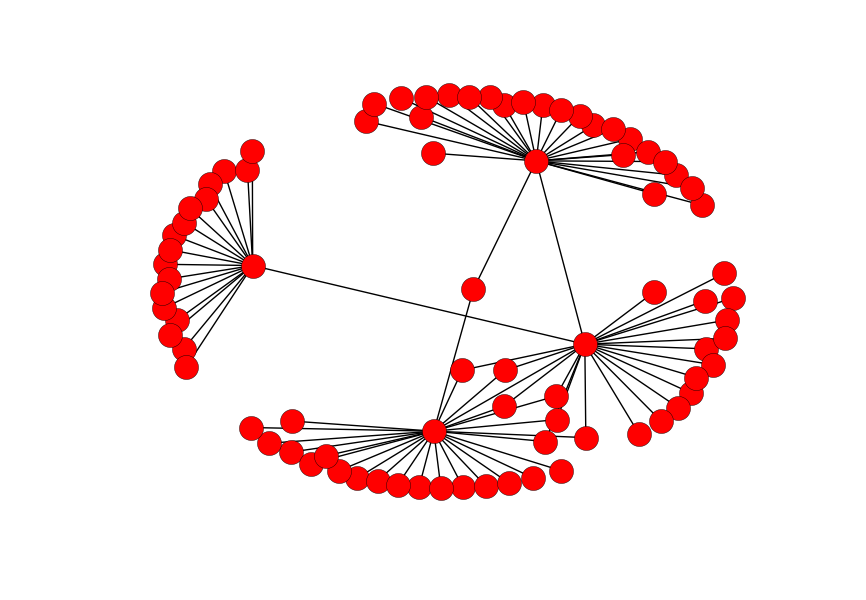

In [19]:
df = dfsc[['author_x','author_y']]
edges = list(zip(df['author_x'],df['author_y']))
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G)
plt.savefig("../figures/communities_spain.png")

The four top submissions in Spain in the year 2014 were:

<b>
1. META Catalan nitpickers are ruining this subreddit for everyone
2. Barcelona vs Manchester City live stream free watch online UEFA
3. Estoy totalmente en contra de la independencia. Pero pienso que si 11.000.000 de personas hablan catalán en España, debería formar parte de la oferta educativa y cultural global del país.
4. Did you vote in the consultation?
</b>

It can be noted from the above figure that there is not much interaction between users to topics belonging to different subreddits.